# Visualizations
In this notebook you can find all the code that I used to plot the pictures that were in the Final Product notebook.   
I used ggplot2 since I have more experience with plotting that way. 

The following plots are in this notebook:
1. Plot Activity Levels
2. Plotting All Intraday Values
3. Heartrate Distribution
4. Heartrate Time of Day
5. Heartrate Day of Week
6. Mapping Places I've Been

In [1]:
import seaborn as sns
import time
import pandas as pd
import fitbit_helper as fh
import numpy as np

%load_ext rpy2.ipython
%matplotlib inline

intraday = pd.read_csv('../Files/intraday.csv')
summaries = pd.read_csv('../Files/summaries.csv')
sleep = pd.read_csv('../Files/sleep.csv')
places = pd.read_csv("../Files/places.csv")


In [2]:
%%R
library(ggplot2)
library(reshape2)

### 1. Plot Activity Levels

In [3]:
to_plot = summaries[['minutesFairlyActive', 'minutesSedentary', 'minutesLightlyActive', 'minutesVeryActive']]
to_plot.reset_index(inplace = True)

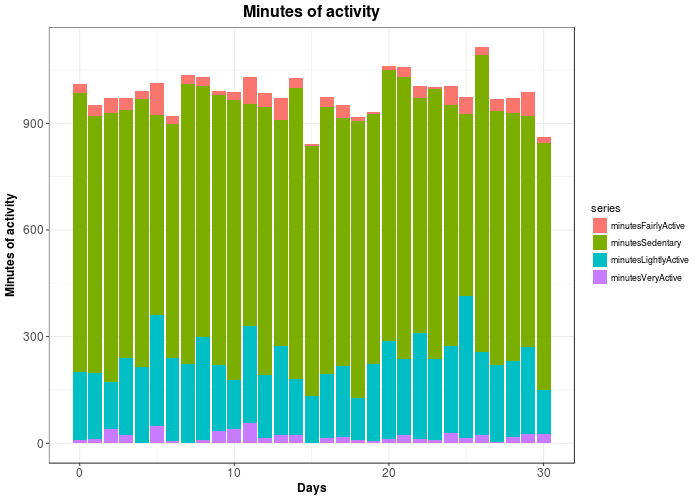

In [19]:
%%R -w 700 -h 500 -i to_plot

to_plot <- melt(to_plot ,  id.vars = 'index', variable.name = 'series')
ggplot(to_plot, aes(index,value)) + 
    geom_col(aes(fill = series), size =1) + 
    theme_bw() +
    labs( y = "Minutes of activity", x = 'Days', title ="Minutes of activity") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

ggsave("../Files/activity.png")

ggplot(to_plot, aes(index,value)) + 
    geom_col(aes(fill = series), size =1) + 
    theme_bw() +
    labs( y = "Minutes of activity", x = 'Days', title ="Minutes of activity") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))


### 2. Plotting All Intraday Values

In [5]:
# Some basic data manipulation
intraday_copy = intraday.copy(deep = True)

intraday_copy['time'] = pd.DatetimeIndex(intraday_copy['time'])
intraday_copy.set_index('time', inplace=True)
intraday_copy = intraday_copy.resample('6H').ffill()

intraday_copy.drop(intraday_copy[np.isnan(intraday_copy['heartrate'])].index, axis = 0, inplace = True)

In [6]:
# Scaling features to plot in same figure
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(intraday_copy)
scaled_features = pd.DataFrame(scaled_features, index=intraday_copy.index, 
                               columns=intraday_copy.columns)

scaled_features.reset_index(inplace=True)
scaled_features = scaled_features.iloc[:-20]
scaled_features.drop('floors', axis = 1, inplace = True)

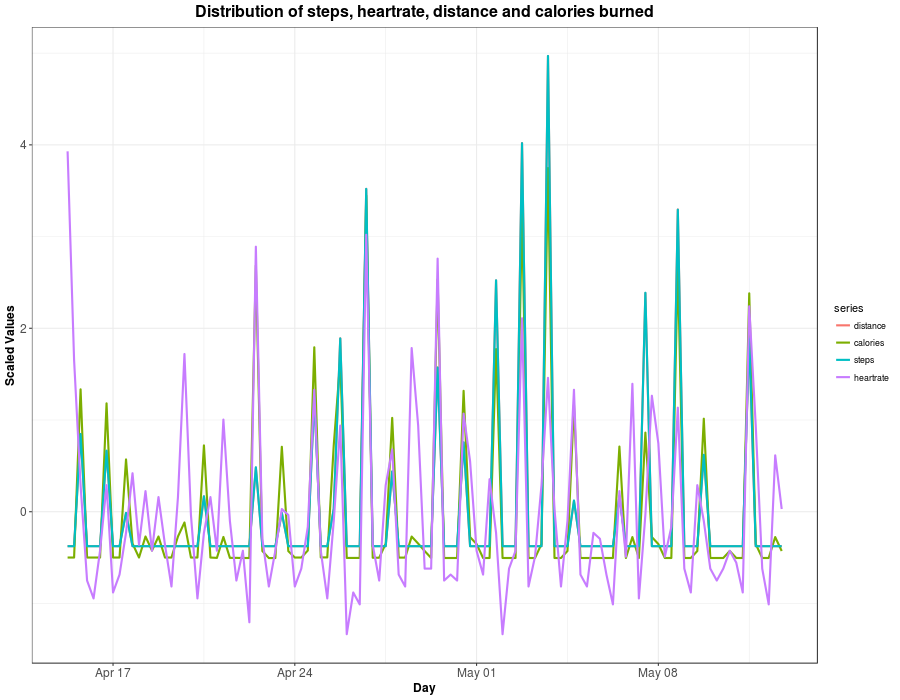

In [20]:
%%R -w 900 -h 700 -i scaled_features

scaled_features <- melt(scaled_features ,  id.vars = 'time', variable.name = 'series')
ggplot(scaled_features, aes(time,value)) + 
    geom_line(aes(colour = series), size =1) + 
    theme_bw() +
    labs( y = "Scaled Values", x = 'Day', title ="Distribution of steps, heartrate, distance and calories burned") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

ggsave("../Files/all intraday.png")

ggplot(scaled_features, aes(time,value)) + 
    geom_line(aes(colour = series), size =1) + 
    theme_bw() +
    labs( y = "Scaled Values", x = 'Day', title ="Distribution of steps, heartrate, distance and calories burned") +
    theme(axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

### 3. Heartrate Distribution

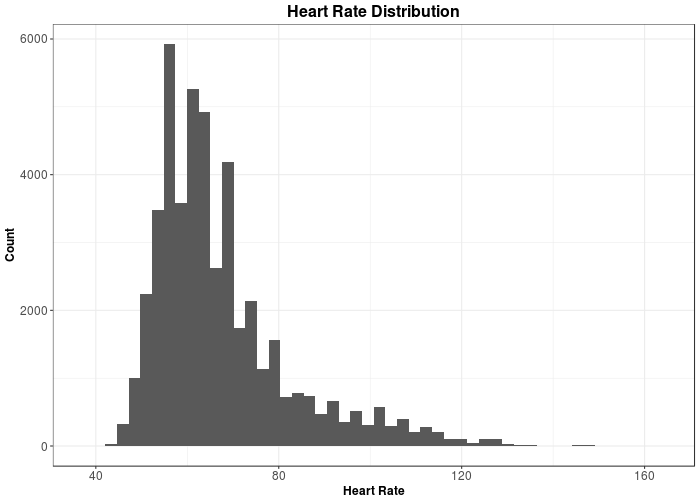

In [17]:
%%R -w 700 -h 500 -i intraday

ggplot(intraday, aes(heartrate)) + 
    geom_histogram(bins = 50) + 
    theme_bw() +
    labs( y = "Count", x = 'Heart Rate', title ="Heart Rate Distribution") +
    theme(legend.position="none", axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

ggsave("../Files/heartrate distribution.png")

ggplot(intraday, aes(heartrate)) + 
    geom_histogram(bins = 50) + 
    theme_bw() +
    labs( y = "Count", x = 'Heart Rate', title ="Heart Rate Distribution") +
    theme(legend.position="none", axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))


### 4. Heartrate Time of Day

In [9]:
# Add part of the day
intraday['time_of_day'] = pd.DatetimeIndex(intraday['time']).hour

time_of_day = {x: ('morning' if x in range(6, 12, 1) else 'night') for x in range(24)}
time_of_day = {x : ('afternoon' if x in range(12, 18, 1) else time_of_day[x]) for x in range(24)}
time_of_day = {x : ('evening' if x in range(18, 25, 1) else time_of_day[x]) for x in range(24)}

intraday['time_of_day'] = intraday['time_of_day'].map(time_of_day)

In [10]:
intraday['hour'] = pd.DatetimeIndex(intraday['time']).hour
hours = [intraday['heartrate'][intraday['hour'] == x].mean() for x in range(24)]
hours = pd.DataFrame(data = hours)
hours.reset_index(inplace = True)
hours.columns = ['hour', 'heartrate']

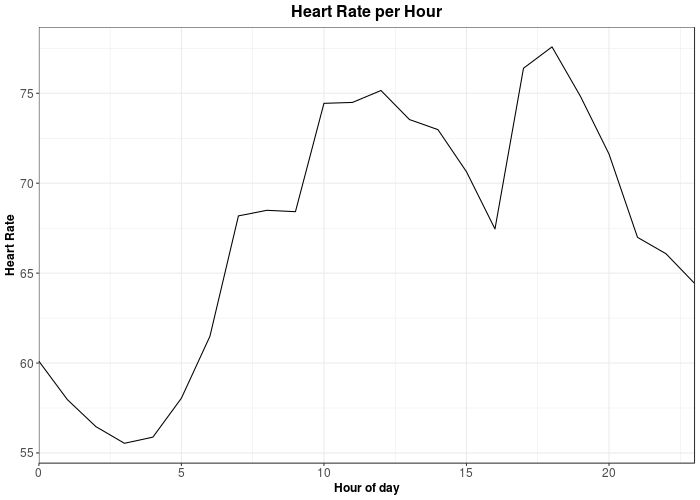

In [16]:
%%R -w 700 -h 500 -i hours

ggplot(hours, aes(y = heartrate, x = hour)) + 
    geom_line() + 
    theme_bw() +
    scale_x_continuous(expand = c(0, 0)) +
    labs( y = "Heart Rate", x = 'Hour of day', title ="Heart Rate per Hour") +
    theme( axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

ggsave("../Files/heartrate per hour.png")

ggplot(hours, aes(y = heartrate, x = hour)) + 
    geom_line() + 
    theme_bw() +
    scale_x_continuous(expand = c(0, 0)) +
    labs( y = "Heart Rate", x = 'Hour of day', title ="Heart Rate per Hour") +
    theme( axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

### 5. Heartrate Day of Week

In [12]:
intraday['time'] = pd.DatetimeIndex(intraday['time'])
intraday['weekday_num'] = pd.DatetimeIndex(intraday['time']).dayofweek
days = [intraday['heartrate'][intraday['weekday_num'] == x].mean() for x in range(7)]
days = pd.DataFrame(data = days)
days.reset_index(inplace = True)
days.columns = ['day', 'heartrate']

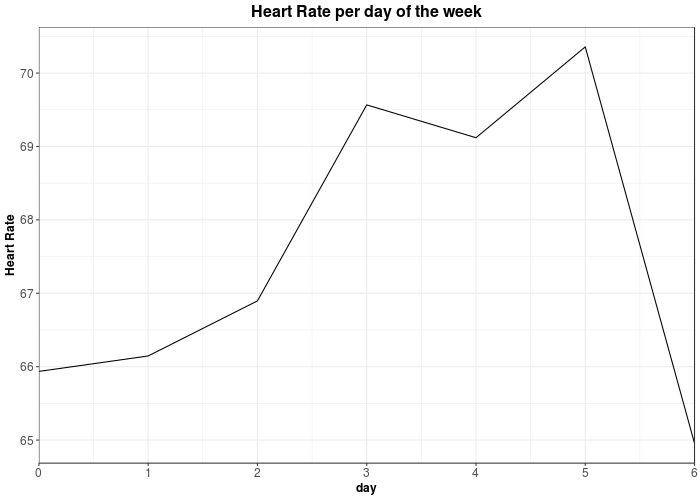

In [15]:
%%R -w 700 -h 500 -i days

ggplot(days, aes(y = heartrate, x = day)) + 
    geom_line() + 
    theme_bw() +
    scale_x_continuous(expand = c(0, 0)) +
    labs( y = "Heart Rate", x = 'day', title ="Heart Rate per day of the week") +
    theme( axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

ggsave("../Files/heartrate per dayofweek.png")

ggplot(days, aes(y = heartrate, x = day)) + 
    geom_line() + 
    theme_bw() +
    scale_x_continuous(expand = c(0, 0)) +
    labs( y = "Heart Rate", x = 'day', title ="Heart Rate per day of the week") +
    theme( axis.text=element_text(size=12), axis.title=element_text(size=12,face="bold"),
         plot.title = element_text(lineheight=1, face="bold", size=16, , hjust = 0.5))

### 6. Mapping Places I've Been

/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Google Maps API Terms of Service: http://developers.google.com/maps/terms.

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Please cite ggmap if you use it: see citation('ggmap') for details.

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=51.676076,5.292423&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Saving 13.9 x 13.9 in image

  warnings.warn(x, RRuntimeWarning)


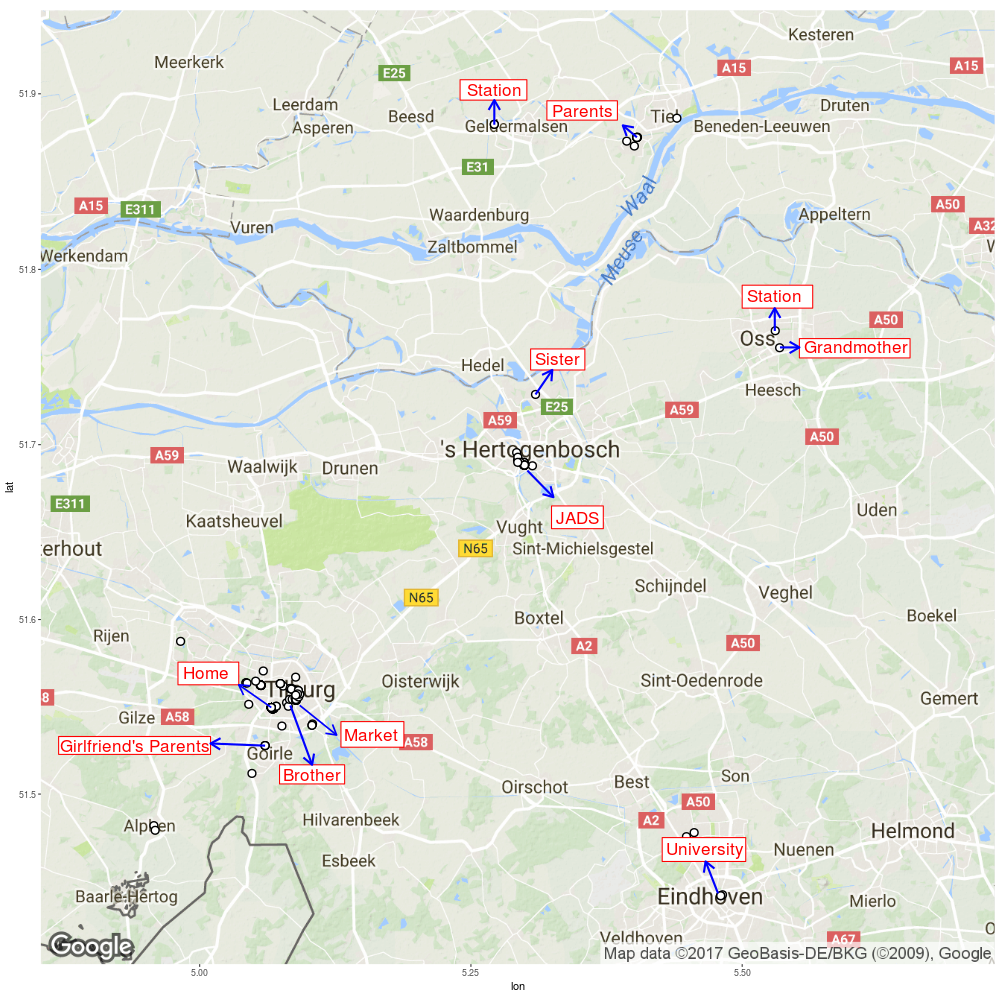

In [14]:
%%R -w 1000 -h 1000 -i places
library(ggmap)

myLocation <- c(lon = 5.292423, lat = 51.676076)

myMap <- get_map(location=myLocation, source="google", crop=TRUE)

plot <- ggmap(myMap)+
 geom_point(data = places, aes(x = Longitude, y = Latitude), shape = 21, 
            colour = "black", fill = "white", size = 3, stroke = 1) +

 annotate('rect', xmin=5.324266, ymin=51.652, xmax=5.372, ymax=51.665, col="red", fill="white") +
 annotate('text', x=5.348266, y=51.658227, label = 'JADS', colour = I("red"), size = 6) +
 annotate('segment', x=5.302, xend=5.326, y=51.685227, yend=51.67,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.130201, ymin=51.526851, xmax=5.188201, ymax=51.541551, col="red", fill="white") +
 annotate('text', x=5.158201, y=51.533851, label = 'Market', colour = I("red"), size = 6) +
 annotate('segment', x=5.092201, xend=5.126201, y=51.550851, yend=51.533851,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 0.8) +

 annotate('rect', xmin=4.98, ymin=51.562629, xmax=5.036, ymax=51.575629, col="red", fill="white") +
 annotate('text', x=5.005990, y=51.569629, label = 'Home', colour = I("red"), size = 6) +
 annotate('segment', x=5.065990, xend=5.036, y=51.549629, yend=51.562629,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 0.8) +

 annotate('rect', xmin=5.552715, ymin=51.760541, xmax=5.654715, ymax=51.749541, col="red", fill="white") +
 annotate('text', x=5.604715, y=51.755541, label = 'Grandmother', colour = I("red"), size = 6) +
 annotate('segment', x=5.534813, xend=5.552715, y=51.755516, yend=51.755541,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.32, ymin=51.885, xmax=5.385, ymax=51.896, col="red", fill="white") +
 annotate('text', x=5.352971, y=51.89, label = 'Parents', colour = I("red"), size = 6) +
 annotate('segment', x=5.402971, xend=5.39, y=51.875235, yend=51.882,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.426278, ymin=51.461301, xmax=5.503278, ymax=51.475, col="red", fill="white") +
 annotate('text', x=5.465278, y=51.468301, label = 'University', colour = I("red"), size = 6) +
 annotate('segment', x=5.477730, xend=5.466278, y=51.442976, yend=51.461301,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.5, ymin=51.777911, xmax=5.565, ymax=51.791, col="red", fill="white") +
 annotate('text', x=5.530068, y=51.784911, label = 'Station', colour = I("red"), size = 6) +
 annotate('segment', x=5.530068, xend=5.53, y=51.764911, yend=51.777911,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.305, ymin=51.742655, xmax=5.355, ymax=51.754655, col="red", fill="white") +
 annotate('text', x=5.329504, y=51.748655, label = 'Sister', colour = I("red"), size = 6) +
 annotate('segment', x=5.309504, xend=5.325, y=51.728655, yend=51.742655,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.073598, ymin=51.505785, xmax=5.133598, ymax=51.516785, col="red", fill="white") +
 annotate('text', x=5.103598, y=51.510785, label = 'Brother', colour = I("red"), size = 6) +
 annotate('segment', x=5.083598, xend=5.103598, y=51.550785, yend=51.516785,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=4.87, ymin=51.522752, xmax=5.01, ymax=51.533, col="red", fill="white") +
 annotate('text', x=4.94, y=51.527752, label = "Girlfriend's Parents", colour = I("red"), size = 6) +
 annotate('segment', x=5.060275, xend=5.01, y=51.527752, yend=51.529,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1) +

 annotate('rect', xmin=5.24, ymin=51.896386, xmax=5.301546, ymax=51.908, col="red", fill="white") +
 annotate('text', x=5.271546, y=51.902386, label = "Station", colour = I("red"), size = 6) +
 annotate('segment', x=5.271546, xend=5.271546, y=51.882386, yend=51.896386,
 colour=I('blue'), arrow = arrow(length=unit(0.4,"cm")), size = 1)


ggsave("../Files/places.png")

plot